## **Reducción de dimensionalidad aplicando PCA en el dataset de iris**

En este notebook se realiza el análisis del dataset iris, que contiene información sobre tres especies de iris con 50 muestras cada una, así como algunas propiedades de cada flor. Una especie de flor es linealmente separable de las otras dos, pero las otras dos no son linealmente separables entre sí. 

Las columnas de este conjunto de datos son:

* Identificación
* Longitud Del SépaloCm
* Ancho Del Sépalo Cm
* Longitud Del PétaloCm
* Ancho De PétaloCm
* Especies

Dataset disponible en: https://www.kaggle.com/datasets/uciml/iris

### **1. Importación de librerias y de los datos**

In [60]:
# importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# herramientas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# escalamiento y normalizacion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
# imputers
from sklearn.impute import SimpleImputer
# metricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
# mejoras
from sklearn.model_selection import GridSearchCV
# reduccion
from sklearn.decomposition import PCA

In [93]:
# datos y conversion a dataframe
df = pd.read_csv('iris.csv')
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### **2. Exploración y limpieza de los datos**

En esta sección se realiza un análisis exploratorio del set de datos con el objetivo de comprenderlos. En el análisis se busca identificar datos faltantes, duplicados, outliers, inconsistencia en datos categóricos y se de ser necesario se aplican técnica de imputación para los datos faltantes y outliers.

In [94]:
# df
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
# tipo de datos
print("Tipos de datos del dataframe")
df.dtypes

Tipos de datos del dataframe


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Los datos disponibles en el dataset son del tipo numérico a excepción de la especie, que se trata de datos del tipo object.

In [96]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [97]:
# df
df.shape

(150, 6)

El dataset contiene 150 filas y 6 columnas de datos.

In [98]:
# estadisticas
print("Estadistica descriptiva del dataset")
df.describe()

Estadistica descriptiva del dataset


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


A continuación se busca identificar datos faltantes en el dataframe.

In [99]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Id,150,0,0.0
SepalLengthCm,150,0,0.0
SepalWidthCm,150,0,0.0
PetalLengthCm,150,0,0.0
PetalWidthCm,150,0,0.0
Species,150,0,0.0


Se observa que el dataset no contiene datos faltantes.

In [100]:
# duplicados
df.duplicated().sum()

0

El dataset no contiene datos duplicados.

Se procede a visualizar la distribución de los datos.

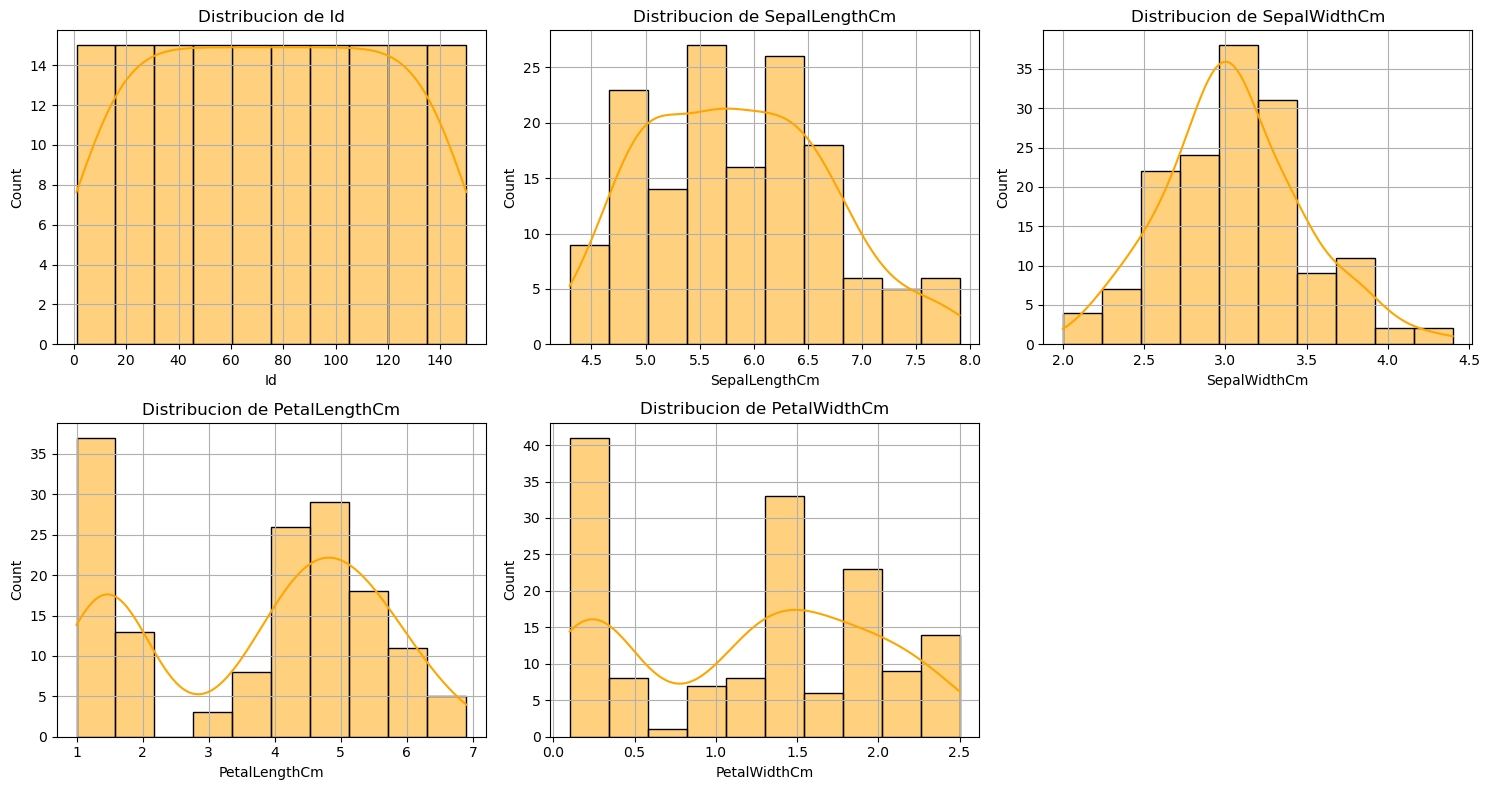

In [101]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="orange", bins=10)  
    plt.title(f"Distribucion de {col}")
    plt.tight_layout()
    plt.grid()

plt.show()

En el gráfico se observan las distribuciones de los datos. El primer gráfico simplemente hace referencia al id, asi que por eso la distribución es de esa forma. En el siguiente gráfico se tiene la distribución del largor del sepalo una flor, el cual hace referencia al cáliz de una flor. Esta distribución se observa con algunos picos máximos a lo largo de la distribución. El siguiente gráfico, que habla del ancho del sepalo, en el cual si se observa una distribución normal. Por otro lado, el cuarto y quinto gráfico muestran la distribución de la longitud y el ancho del pétalo de una flor respectivamente, con algunos máximos aleatorios.

A continuación, se procede a visualizar outliers en los datos utilizando boxplots.

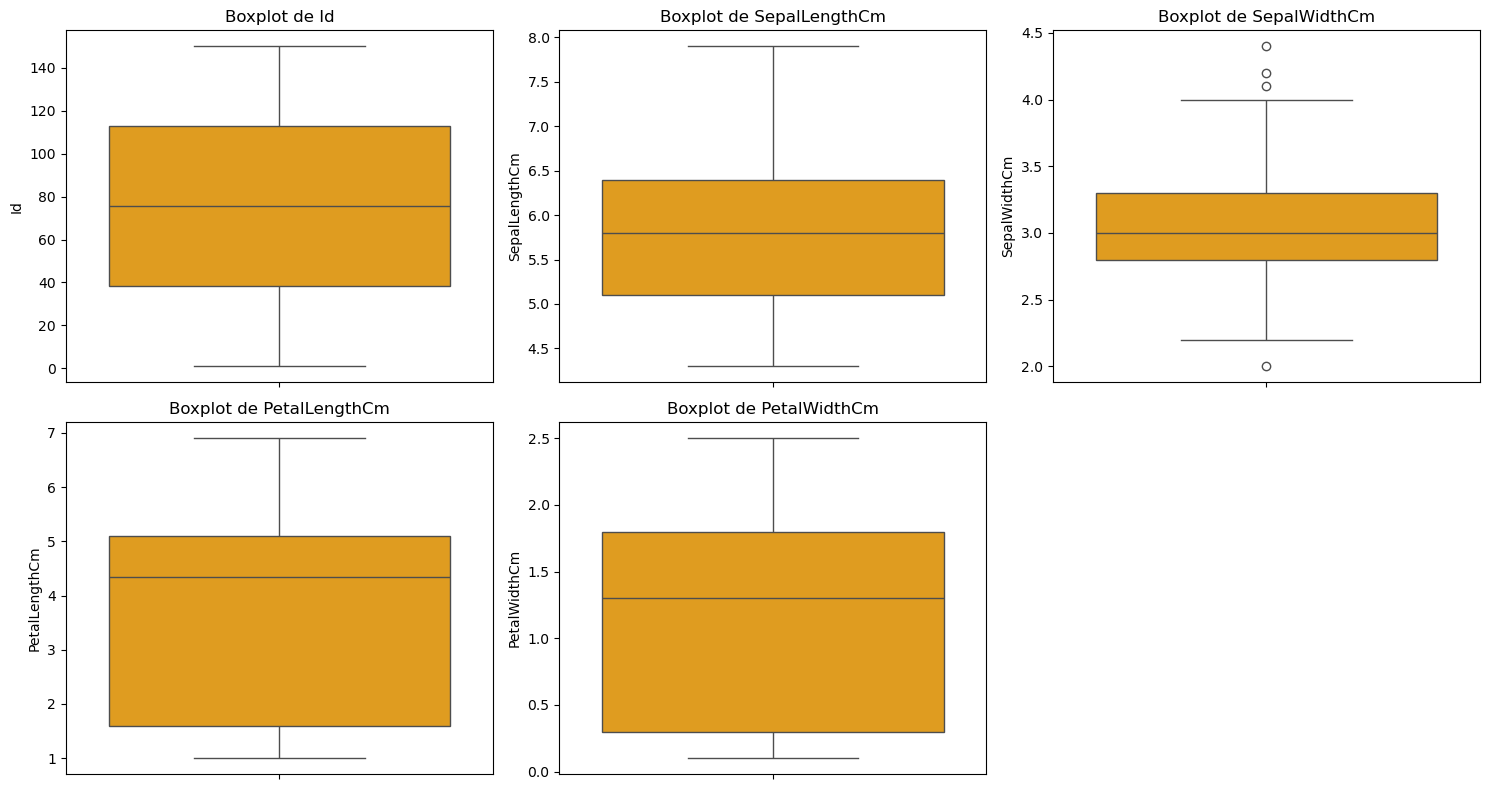

In [102]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

En los boxplots se logra visualizar que en el set de datos hay outliers el ancho del sépalo de una flor.

In [103]:
# estadisticas
df['SepalWidthCm'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

Con el objetivo de ir analizando los outliers de variables se define la funcion identificar_ouliers.

In [104]:
# funcion para identificar outliers
def identificar_outliers(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # filtrar 
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    
    return {
        'outliers': outliers,
        'limites': {'inferior': lower_bound, 'superior': upper_bound}}

Se procede a analizar la variable SepalWidthCm: ancho en cm del sépalo de una flor.

In [105]:
# idenficar outliers de SepalWidthCm
identificar_outliers(df,'SepalWidthCm')

{'outliers':     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
 15  16            5.7           4.4            1.5           0.4   
 32  33            5.2           4.1            1.5           0.1   
 33  34            5.5           4.2            1.4           0.2   
 60  61            5.0           2.0            3.5           1.0   
 
             Species  
 15      Iris-setosa  
 32      Iris-setosa  
 33      Iris-setosa  
 60  Iris-versicolor  ,
 'limites': {'inferior': 2.05, 'superior': 4.05}}

Se analizaron los outliers en SepalWidthCm, y sin embargo, aparentemente se trata de las forma particular de esa flor.

In [106]:
# idenficar categorias unicas
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

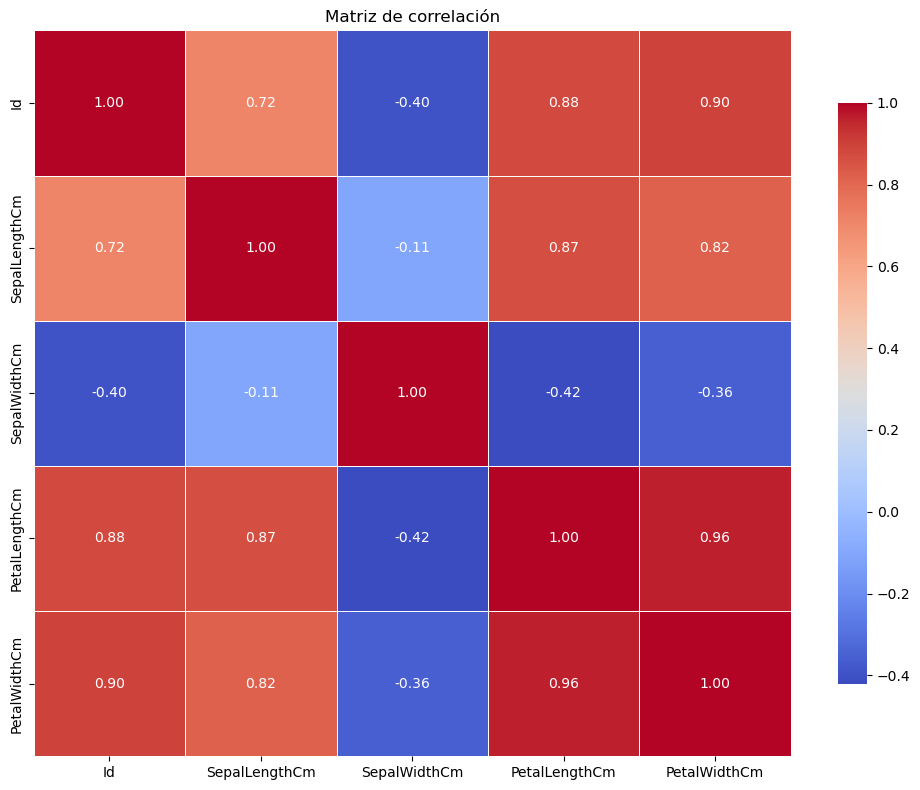

In [107]:
# variables numéricas
numerical_columns = df.select_dtypes(include=['int64','float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title('Matriz de correlación')

# grafico
plt.tight_layout()
plt.show()

Se observan correlaciones importantes entre las variables. 

### **3. Preprocesamiento de los datos**

El objetivo es reducir las componentes del dataset a 2 componentes principales aplicando PCA.

Se eligen como variable target a species y las demas columnas seran utlilizadas como predictoras.

In [108]:
# variables categoricas y target
x = df.drop(columns=['Species'])  
y = df[['Species']]

Se divide en train y test.

In [109]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Se escalan los datos de x aplicando StandardScaler para aplicar PCA.

In [110]:
# escalamiento de los datos
scaler = StandardScaler()

In [111]:
# procesar las columnas
# fit transform para train
x_train_scaled = scaler.fit_transform(x_train)

# transform para test
x_test_scaled = scaler.transform(x_test)

In [112]:
# resumen de los datos escalados
print("Resumen de datos escalados para train:")
print(f"Media por característica (aproximadamente 0): {x_train_scaled.mean(axis=0)[:5]}")
print(f"Desviación estándar por característica (aproximadamente 1): {x_train_scaled.std(axis=0)[:5]}")

Resumen de datos escalados para train:
Media por característica (aproximadamente 0): [-2.32618158e-17  3.67959631e-16  4.90678926e-18 -3.17206578e-17
 -2.53765263e-17]
Desviación estándar por característica (aproximadamente 1): [1. 1. 1. 1. 1.]


Se aplica PCA para reducir a dos componentes principales.

In [113]:
# aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)

# aplicar al train
x_train_pca = pca.fit_transform(x_train_scaled)

# aplicar al test
x_test_pca = pca.transform(x_test_scaled)

Se calcula la varianza explicada 

In [114]:
# mostrar la varianza explicada
print(f"Varianza explicada por cada componente principal: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")

Varianza explicada por cada componente principal: [0.72503463 0.19825917]
Varianza total explicada: 0.9232938001572882


Estas variables permiten observar cuánta varianza se explica por cada componente principal. Aqui se observa que se quedaron dos componentes principales que explican el 72% y 19% de la varianza de los datos. Como la suma de explained_variance_ratio_ es cerca de 1, con un valor de 92%, se concluye que se logro una buena reducción de dimensionalidad, ya que luego de aplicar PCA, se mantuvo el 92% de la varianza total de los datos. Es decir, se logró reducir a dos componentes el dataset conservando aproximadamente un 92% de la información original.

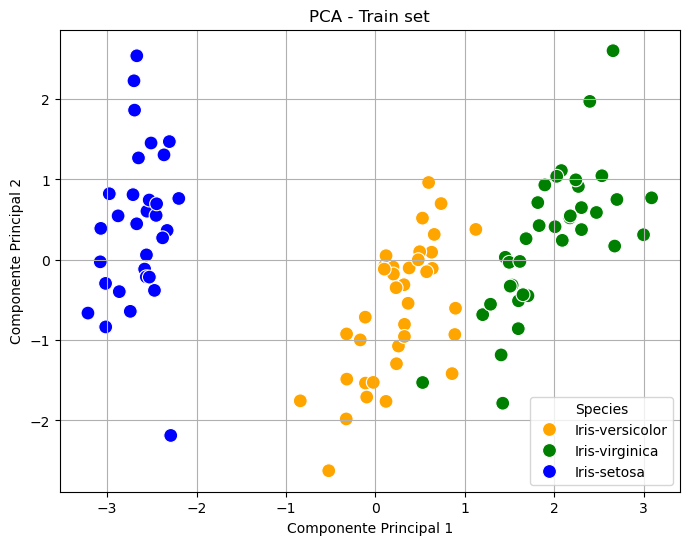

In [115]:
# convertir a df
df_pca = pd.DataFrame(x_train_pca, columns=['PC1', 'PC2'])
df_pca['Species'] = y_train['Species'].reset_index(drop=True)

# grafico 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Species', palette={'Iris-setosa': 'blue', 'Iris-versicolor': 'orange', 'Iris-virginica': 'green'}, s=100)

# configuraciones
plt.title('PCA - Train set')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title="Species")
plt.grid()

# Mostrar 
plt.show()


En el grafico se logra observar la distribución respecto a la reducción de componentes. Inicialmente se visualiza que las tres especies se encuentran bien separadas y no se superponen, lo que indica que tras haber aplicado la reducción de dimensionalidad se logró conservar las características de cada especie. Otro punto importante a destacar es la agrupación de los datos, se observa que iris-setosa se agrupa un poco más que iris-versicolor y iris-virginica, lo que sugiere que iris-setosa tienen características distintivas que separan claramente de la separa claramente de las otras dos especies. 

A modo de comparar, se realiza la distribución original.

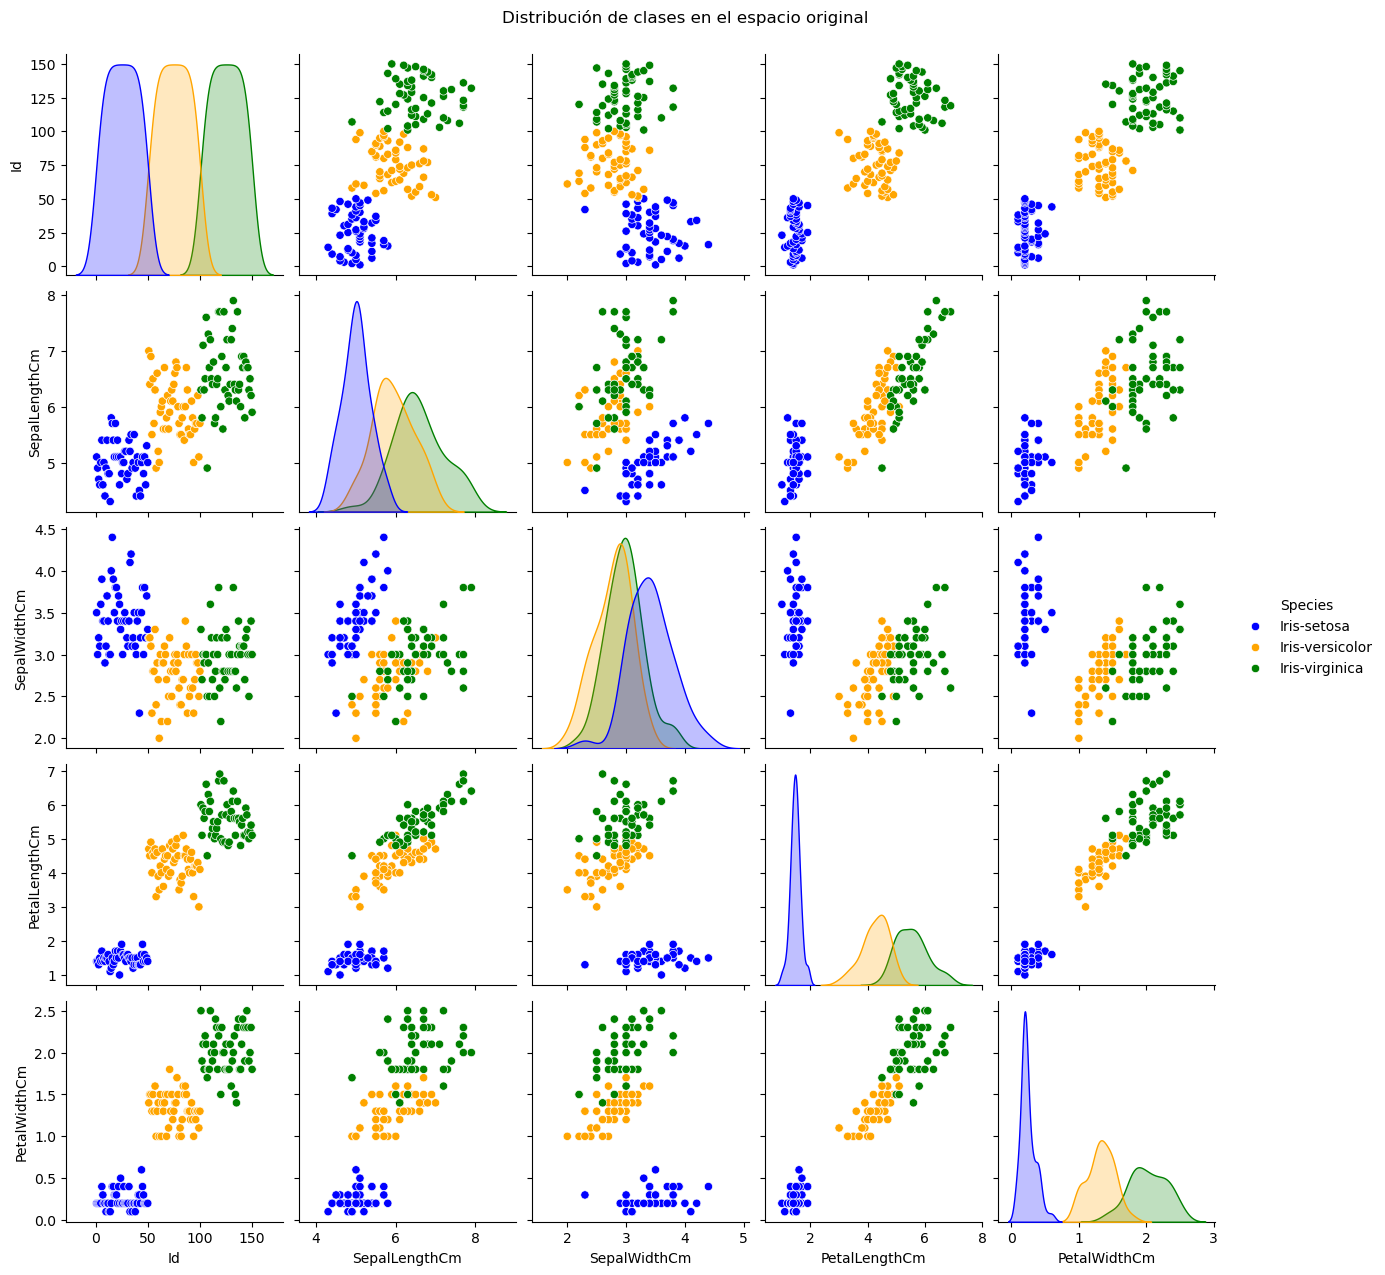

In [116]:
# distribución de las clases en el espacio original
sns.pairplot(df, hue='Species', palette={'Iris-setosa': 'blue', 'Iris-versicolor': 'orange', 'Iris-virginica': 'green'})
plt.suptitle('Distribución de clases en el espacio original', y=1.02)
plt.show()

En este grafico se observa la distribucion original de las variables. Nuevamente se observa la clara separación de iris-setosa de las otras dos, lo que sugiere que tiene características propias, se observa tambien que iris-versicolor e iris-virginica se solapan en algunas variables como el ancho y longitud del sepalo asi como tambien en la longitud del petalo. Se visualiza que la separación de las clases original es similar a PCA, entonces se conluye que PCA realizo un buen trabajo manteniendo las relaciones entre clases. Por otro lado, este grafico tambien permite identificar que las clases más discriminantes son la longitud del petalo y el ancho del petalo. 

### **Conclusión**

Esta actividad tuvo por objetivo analizar el dataset iris, que contiene información sobre las características de tres tipos distintos de flores, y aplicar PCA para reducir las dimensiones del dataset. Se concluye que PCA tiene un buen funcionamiento en este caso ya que realiza una buena elección de componentes principales manteniendo el 92% de la varianza de los datos originales.

### **Modelo Decission Trees Classifier**

Se aplica el modelo decission trees classifier sin PCA.

In [128]:
# ajustar modelo
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=4)

# entrenar el modelo 
tree_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=42)

In [129]:
# realizar predicciones
y_pred = tree_model.predict(x_test_scaled)

In [130]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 1.0
Informe de Clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [120]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [121]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

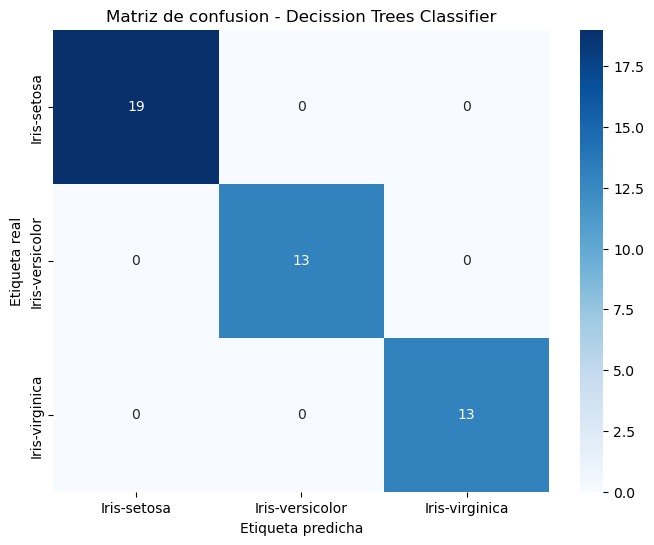

In [122]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Decission Trees Classifier")

Se aplica nuevamente el modelo pero utilizando PCA

In [123]:
# ajustar modelo
tree_model_pca = DecisionTreeClassifier(random_state=42)

# entrenar el modelo
tree_model_pca.fit(x_train_pca, y_train)

DecisionTreeClassifier(random_state=42)

In [124]:
# realizar predicciones
y_pred_pca = tree_model_pca.predict(x_test_pca)

In [125]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred_pca)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9777777777777777
Informe de Clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [126]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_pca)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


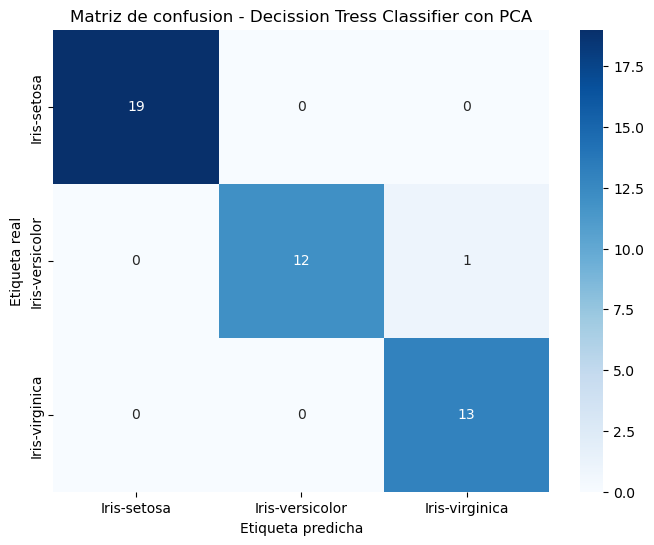

In [127]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Decission Tress Classifier con PCA")